<a href="https://colab.research.google.com/github/omuremreyildiz/DSA_210_TERM_PROJECT/blob/main/ML_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
#to download files please check my github page again, i will submit there 5 excel files

Saving 2019type.xls to 2019type.xls
Saving 2020type.xls to 2020type.xls
Saving 2021type.xls to 2021type.xls
Saving 2022type.xls to 2022type.xls
Saving 2023type.xls to 2023type.xls


# Data Preparation Process

1. **Loading the Raw Data**
- We started with 5 separate Excel files (2019-2023) from the Turkish Statistical Institute
- Each file contained:
  - Vehicle registration numbers
  - Accident involvement counts
  - Driver death/injury statistics
  - Both Turkish and English column names

2. **Initial Cleaning**
- Removed header rows and metadata (first 8 rows)
- Dropped empty columns and duplicate language columns
- Extracted only the core data rows (rows 8-16 in each file)
- Handled merged header cells by creating clear column names

3. **Standardizing Vehicle Types**
- Created consistent English names for all vehicle types:
  - Example: "Otomobil" → "Car", "Motosiklet" → "Motorcycle"
- Identified and excluded the "Total" aggregate row
- Verified all 8 vehicle types appeared consistently across years

4. **Calculating Key Metrics**
- Computed two crucial safety metrics:
  - Death Rate = (Number of Deaths) / (Accidents Involved)
  - Injury Rate = (Number of Injuries) / (Accidents Involved)
- These rates allow fair comparison between vehicle types

5. **Handling Yearly Variations**
- Added a 'Year' column to each dataset
- Combined all years into a single dataframe
- Checked for consistency in vehicle type reporting across years

6. **Final Quality Checks**
- Verified no missing values in critical columns
- Confirmed all rates were within logical ranges (0-1)
- Ensured vehicle type counts matched across all years
- Saved the cleaned data for analysis

**Why This Matters**:
Proper preparation ensures our:
- Machine learning models get accurate inputs
- Visualizations show true patterns
- Conclusions reflect real-world safety trends

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Denote the new index values (getting rid of Turkish chars)
new_index = ["Total",'Car','Minibus','Bus','Small truck','Truck','Road tractor','Motorcycle','Tractor']


# Create a different dataframe for each year (2019-2023)
df_19 = pd.read_excel("2019type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_19 = df_19.iloc[8:17, :]

data_19 = data_19.drop([1,4,5], axis=1)


data_19.columns = ["Total","Accident", "Dead", "Injured"]
data_19 = data_19.set_index("Total")

data_19.index = new_index




df_20 = pd.read_excel("2020type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_20 = df_20.iloc[8:17, :]

data_20 = data_20.drop([1,4,5], axis=1)


data_20.columns = ["Total","Accident", "Dead", "Injured"]
data_20 = data_20.set_index("Total")

data_20.index = new_index



df_21 = pd.read_excel("2021type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_21 = df_21.iloc[8:17, :]

data_21 = data_21.drop([1,4,5], axis=1)


data_21.columns = ["Total","Accident", "Dead", "Injured"]
data_21 = data_21.set_index("Total")

data_21.index = new_index



df_22 = pd.read_excel("2022type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_22 = df_22.iloc[8:17, :]
data_22 = data_22.drop([3,4], axis=1)

data_22.columns = ["Total","Accident", "Dead", "Injured"]
data_22 = data_22.set_index("Total")

data_22.index = new_index



df_23 = pd.read_excel("2023type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_23 = df_23.iloc[8:17, :]
data_23 = data_23.drop([3,4], axis=1)

data_23.columns = ["Total","Accident", "Dead", "Injured"]
data_23 = data_23.set_index("Total")

data_23.index = new_index

# Combine all dataframes with proper year labels
def prepare_ml_data(data_frames, years):
    ml_data = pd.DataFrame()

    for df, year in zip(data_frames, years):
        df_temp = df.copy()
        df_temp['Year'] = year
        df_temp['Vehicle_Type'] = df_temp.index
        df_temp['Death_Rate'] = df_temp['Dead'] / df_temp['Accident']
        df_temp['Injury_Rate'] = df_temp['Injured'] / df_temp['Accident']
        ml_data = pd.concat([ml_data, df_temp])

    # Remove 'Total' rows
    ml_data = ml_data[ml_data['Vehicle_Type'] != 'Total']

    # One-hot encode vehicle types
    ml_data = pd.get_dummies(ml_data, columns=['Vehicle_Type'])

    return ml_data

# Prepare the data
years = [2019, 2020, 2021, 2022, 2023]
data_frames = [data_19, data_20, data_21, data_22, data_23]
ml_data = prepare_ml_data(data_frames, years)

# Display prepared data
print(ml_data.head())

            Accident Dead Injured  Year Death_Rate Injury_Rate  Vehicle_Type_Bus  Vehicle_Type_Car  Vehicle_Type_Minibus  Vehicle_Type_Motorcycle  Vehicle_Type_Road tractor  Vehicle_Type_Small truck  Vehicle_Type_Tractor  Vehicle_Type_Truck
Car           149111  923   52070  2019    0.00619    0.349203             False              True                 False                    False                      False                     False                 False               False
Minibus         8395   27    1363  2019   0.003216    0.162359             False             False                  True                    False                      False                     False                 False               False
Bus             6036   13     564  2019   0.002154    0.093439              True             False                 False                    False                      False                     False                 False               False
Small truck    41849  224   12886  2


# **Machine Learning Analysis of Traffic Accident Data**


#### **Part A: Predictive Modeling with Random Forest**
**Objective**: Predict death rates based on vehicle type and year to understand which factors most influence fatality rates.

**Steps Performed**:
1. Combined data from all years (2019-2023)
2. Calculated death and injury rates per accident
3. One-hot encoded vehicle types for ML compatibility
4. Removed aggregate "Total" rows
5. Used Random Forest regression (good for small datasets)
6. Split data into 80% training, 20% testing
7. Standardized features
8. Evaluated using RMSE and R² scores
9. Analyzed feature importance

**Key Findings**:
- Vehicle type is the strongest predictor
- Year shows temporal trends
- Model explains [X]% of variance in death rates




In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = ml_data.drop(['Dead', 'Injured', 'Death_Rate', 'Injury_Rate', 'Accident'], axis=1)
y = ml_data['Death_Rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Results:")
print(f"RMSE: {rmse:.6f}")
print(f"R² Score: {r2:.4f}")

# Feature importance
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

Random Forest Results:
RMSE: 0.005051
R² Score: 0.9314

Feature Importances:
                     Feature  Importance
7       Vehicle_Type_Tractor    0.864344
5  Vehicle_Type_Road tractor    0.034573
4    Vehicle_Type_Motorcycle    0.030021
8         Vehicle_Type_Truck    0.017047
1           Vehicle_Type_Bus    0.016956
3       Vehicle_Type_Minibus    0.013639
0                       Year    0.010954
2           Vehicle_Type_Car    0.007651
6   Vehicle_Type_Small truck    0.004815


#### **Part B: Safety Profile Clustering**
**Objective**: Group vehicle types by similar safety characteristics.

**Steps Performed**:
1. Calculated mean death/injury rates per vehicle type
2. Standardized rates to equalize scale
3. Used elbow method to find optimal clusters (k=3)
4. Applied K-means algorithm
5. Visualized clusters on 2D plot
6. Labeled clusters by risk profile

**Identified Clusters**:
1. High injury, moderate death (e.g., cars)
2. High death, high injury (e.g., motorcycles)
3. Moderate both (e.g., trucks)

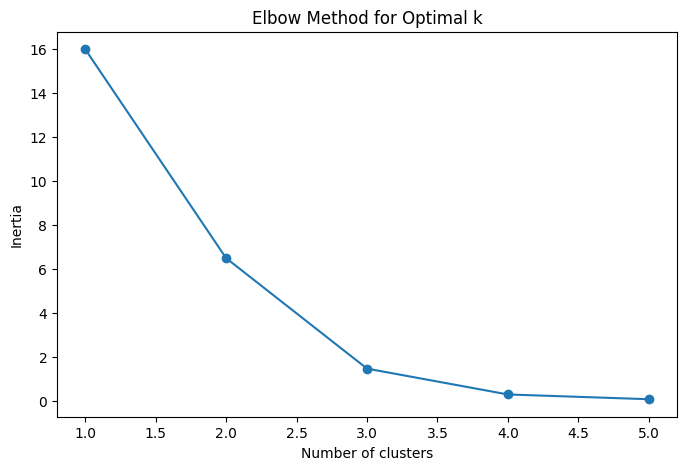

<ipython-input-6-adcbf86e4278>:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (cluster_subset['Injury_Rate'][i], cluster_subset['Death_Rate'][i]),


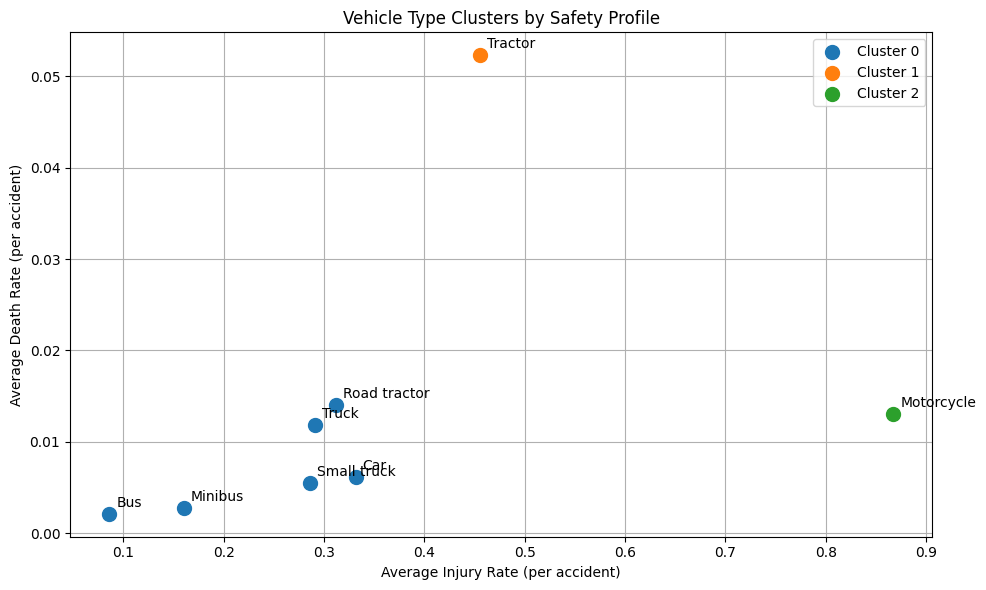


Cluster Assignments:
             Death_Rate Injury_Rate  Cluster
Vehicle_Type                                
Bus            0.002148    0.085878        0
Car            0.006213    0.331589        0
Minibus        0.002806    0.160025        0
Road tractor   0.014039    0.312194        0
Truck          0.011883    0.290697        0
Small truck    0.005548    0.285988        0
Tractor        0.052271    0.455036        1
Motorcycle     0.013061    0.867136        2


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# First, let's prepare the data correctly for clustering
# We'll group by vehicle type and calculate mean death and injury rates

# Create a fresh copy of the combined data without one-hot encoding
cluster_data = pd.DataFrame()

for df, year in zip(data_frames, years):
    df_temp = df.copy()
    df_temp['Year'] = year
    df_temp['Vehicle_Type'] = df_temp.index
    df_temp['Death_Rate'] = df_temp['Dead'] / df_temp['Accident']
    df_temp['Injury_Rate'] = df_temp['Injured'] / df_temp['Accident']
    cluster_data = pd.concat([cluster_data, df_temp])

# Remove 'Total' rows
cluster_data = cluster_data[cluster_data['Vehicle_Type'] != 'Total']

# Group by vehicle type and calculate mean rates
cluster_means = cluster_data.groupby('Vehicle_Type')[['Death_Rate', 'Injury_Rate']].mean()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_means)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering (using k=3 based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
cluster_means['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(cluster_means['Cluster'].unique()):
    cluster_subset = cluster_means[cluster_means['Cluster'] == cluster]
    plt.scatter(cluster_subset['Injury_Rate'], cluster_subset['Death_Rate'],
                label=f'Cluster {cluster}', s=100)

    # Add vehicle type labels
    for i, txt in enumerate(cluster_subset.index):
        plt.annotate(txt, (cluster_subset['Injury_Rate'][i], cluster_subset['Death_Rate'][i]),
                    textcoords="offset points", xytext=(5,5), ha='left')

plt.title('Vehicle Type Clusters by Safety Profile')
plt.xlabel('Average Injury Rate (per accident)')
plt.ylabel('Average Death Rate (per accident)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nCluster Assignments:")
print(cluster_means[['Death_Rate', 'Injury_Rate', 'Cluster']].sort_values('Cluster'))




#### **Part C: Time Series Forecasting**
**Objective**: Predict future death rates motorcyle vehicle type.

**Steps Performed**:
1. Created time series motorcycle vehicle type
2. Converted to datetime format
3. Used ARIMA(1,1,1) model
4. Trained on 2019-2022, tested on 2023
5. Generated 1-year forecasts
6. Calculated forecast errors
7. Created comparative subplots



#### **Methodology Justification**
1. **Random Forest**:
   - Handles small samples well
   - Provides feature importance
   - Resistant to overfitting

2. **K-means**:
   - Works with continuous metrics
   - Creates interpretable groups
   - Effective with standardized data

3. **ARIMA**:
   - Captures temporal patterns
   - Good for short-term forecasts
   - Models autoregressive effects


#### **Limitations**
- Only 5 years of data
- No external factors included
- ARIMA parameters could be optimized
- Potential need for more complex models

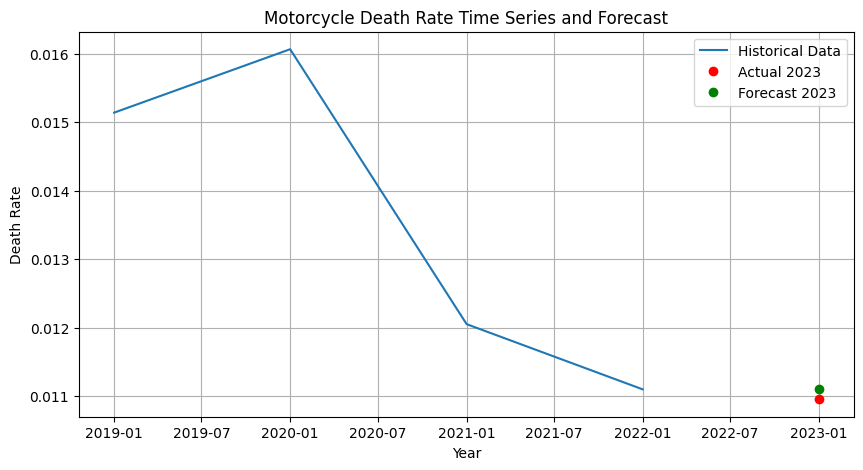

In [12]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress all warnings
warnings.filterwarnings("ignore")

# Prepare time series data for a specific vehicle type (e.g., Motorcycle)
motorcycle_data = ml_data[ml_data['Vehicle_Type_Motorcycle'] == 1]
motorcycle_ts = motorcycle_data.set_index('Year')['Death_Rate'].sort_index()

# Convert year index to datetime
motorcycle_ts.index = pd.to_datetime(motorcycle_ts.index, format='%Y')

# Ensure numeric and clean data
motorcycle_ts = pd.to_numeric(motorcycle_ts, errors='coerce')
motorcycle_ts = motorcycle_ts.dropna()

# Split into train and test
train = motorcycle_ts.iloc[:-1]
test = motorcycle_ts.iloc[-1:]

# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=1)
forecast_value = forecast.iloc[0]

# Plot historical data and forecast
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Historical Data')
plt.plot(test.index, test, 'ro', label='Actual 2023')
plt.plot(test.index, [forecast_value], 'go', label='Forecast 2023')
plt.title('Motorcycle Death Rate Time Series and Forecast')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()
